<a href="https://colab.research.google.com/github/ClaudiaMetz/Ponele-Musica-a-tus-Emociones-_-Grupo10-_-ISPC-_-TSCDIA/blob/main/FotoEmocion__Cancion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROYECTO: "Ponele Música a tus Emociones"***
---

Idea Principal: Detectar la Emoción en una foto y Recomendar una Canción

Este trabajo combina técnicas de Procesamiento de Imágenes y Procesamiento del Habla para crear una experiencia única: El usuario suministra una fotografía por medio de la computadora. Primero se analiza la emoción predominante en la foto utilizando un modelo de aprendizaje profundo. Luego, en base a esa emoción detectada, se genera una frase relacionada con la emoción. Finalmente, se selecciona una canción de una base de datos o conjunto de temas musicales y la expresa con un audio. Para su desarrollo utilizamos téçnicas de Minería de Datos y obviamente Aprendizaje Automático. ***El resultado es una recomendación musical personalizada basada en la imagen y el estado emocional del usuario.***

*Iniciamos el proyecto:*

***Vamos a utilizar el Dataset FER2013.***
---
El conjunto de datos FER2013 (Facial Expression Recognition 2013) contiene imágenes junto con categorías que describen la emoción de la persona en ellas. Este conjunto de datos contiene aproximadamente 30,000 imágenes RGB faciales de diferentes expresiones con un tamaño restringido a 48x48.

Las principales etiquetas del conjunto de datos FER2013 se pueden dividir en 7 tipos: 0=Enojado, 1=Asco, 2=Miedo, 3=Feliz, 4=Triste, 5=Sorpresa, 6=Neutral. La expresión de asco tiene el número mínimo de imágenes, unas 600, mientras que otras etiquetas tienen casi 5,000 muestras cada una.

Es un recurso muy utilizado en el campo del reconocimiento de expresiones faciales y puede proporcionarnos una buena variedad de datos para entrenar un modelo.

*Descargamos el conjunto de datos FER2013 de la página Kaggle.com*

**Ahora importaremos las bibliotecas necesarias para el análisis del dataset.**

A continuación se observa las importaciones de bibliotecas de Python que son útiles para procesamiento de imágenes, visualización de datos, y construcción de modelos de aprendizaje automático y profundo:

**NumPy (import numpy as np)**: Biblioteca fundamental para computación científica en Python. Proporciona soporte para grandes matrices multidimensionales y una colección de funciones matemáticas de alto nivel.

**SciPy (from scipy import misc)**: Biblioteca que complementa a NumPy y proporciona funciones adicionales para computación científica. Aquí se importa el submódulo misc, que contiene funciones de utilidad misceláneas.

**PIL (Python Imaging Library) (from PIL import Image)**: Biblioteca para la manipulación de imágenes.

**glob (import glob)**: Biblioteca para encontrar todos los nombres de ruta que coinciden con un patrón especificado, útil para manejar múltiples archivos.

**Matplotlib (import matplotlib.pyplot as plt y from matplotlib.pyplot import imshow)**: Biblioteca para crear gráficos y visualizaciones.

**IPython.display (from IPython.display import SVG)**: Biblioteca para mostrar contenido interactivo en Jupyter Notebooks.

**OpenCV (import cv2)**: Biblioteca de visión por computadora para procesar imágenes y videos.

**Seaborn (import seaborn as sn)**: Biblioteca para visualización de datos basada en Matplotlib, proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos y informativos.

**Pandas (import pandas as pd)**: Biblioteca para manipulación y análisis de datos, proporciona estructuras de datos flexibles y eficientes.

**pickle (import pickle)**: Biblioteca para serializar y deserializar estructuras de objetos de Python.

**Keras (import keras y varios submódulos)**: Biblioteca de alto nivel para crear y entrenar modelos de aprendizaje profundo. Las importaciones incluyen capas, modelos, optimizadores, funciones de pérdida, y utilidades para trabajar con datos de imágenes.

**TensorFlow (import tensorflow as tf y submódulos de Keras dentro de TensorFlow)**: Plataforma de aprendizaje automático de extremo a extremo. Aquí se importa para usar junto con Keras, ya que Keras es una API de alto nivel que puede funcionar sobre TensorFlow.

**Scikit-learn (from sklearn.metrics import confusion_matrix, classification_report)**: Biblioteca para aprendizaje automático en Python. Aquí se importa para evaluar modelos con matrices de confusión y reportes de clasificación.

**ImageDataGenerator (from tensorflow.keras.preprocessing.image import ImageDataGenerator)**: Utilidad de Keras para generar nuevas imágenes mediante técnicas de aumento de datos.

**VGG (from keras.applications import vgg16, vgg19)**: Modelos de redes neuronales convolucionales preentrenados, útiles para tareas de clasificación de imágenes y transferencia de aprendizaje.

Estas importaciones proporcionan un conjunto robusto de herramientas para el procesamiento y análisis de imágenes, construcción y entrenamiento de modelos de aprendizaje profundo, y evaluación del rendimiento de los modelos en Python.

In [ ]:
import numpy as np
from scipy import misc
from PIL import Image
import glob
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import SVG
import cv2
import seaborn as sn
import pandas as pd
import pickle
import keras
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras.utils import layer_utils, np_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
from keras.utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras import losses
from tensorflow.python.keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.applications import vgg16, vgg19

Vamos a montar inicialmente el dataset en el Colab para su análisis.

In [ ]:
# Montar Google Drive si el archivo está almacenado allí
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta al archivo CSV FER2013
file_path = '/content/drive/MyDrive/Desarrollo de Sistemas IA/fer2013.csv'

# Cargar el conjunto de datos
data = pd.read_csv(file_path)

Mounted at /content/drive


Antes de iniciar con los modelos vamos a explorar un poco los datos:

In [ ]:
# Primera vista de los datos:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Como se puede apreciar el dataset consiste de 3 columnas:

**emotion**: Contiene la etiqueta que define la emoción de la imágen y es nuestra variable objetivo. (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

**pixels**: Corresponden a los valores de cada uno de los pixeles. De acuerdo con las instrucciones de la competencia, las imágenes son de 48x48.

**Usage**: Corresponde al set de datos correspondientes: Train, PublicTest, Private Test.

In [ ]:
data["Usage"].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

Se puede ver que existen cerca de 28700 imágenes que son utilizadas para entrenamiento. Estas imágenes contienen una etiqueta por lo que podían ser utilizadas para entrenar.

Adicionalmente se pueden ver dos grupos, Public y Private Test que correspondían a los Sets de Validación. El set público era el que se usaba para evaluar los resultados al subirlos a la plataforma, mientras que el Private correspondía a los datos ocultos que se liberan sólo al finalizar la competencia para decidir a los ganadores.

In [ ]:
# Ver datos nulos
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

Y vamos a hacer algunos análisis y visualizaciones de los datos:

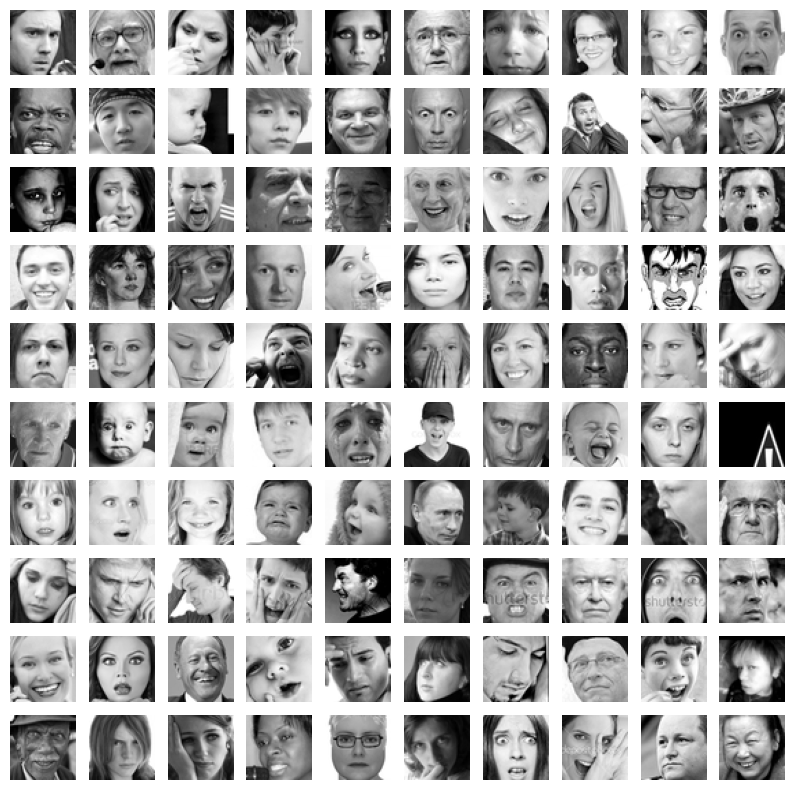

In [ ]:
# Visualizar algunas imágenes del conjunto de datos
fig, axes = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
    for j in range(10):
        array = np.array(data['pixels'][i*10 + j].split(' '), dtype=np.uint8)
        array = array.reshape(48, 48)
        axes[i, j].imshow(array, cmap='gray')
        axes[i, j].axis('off')

plt.show()

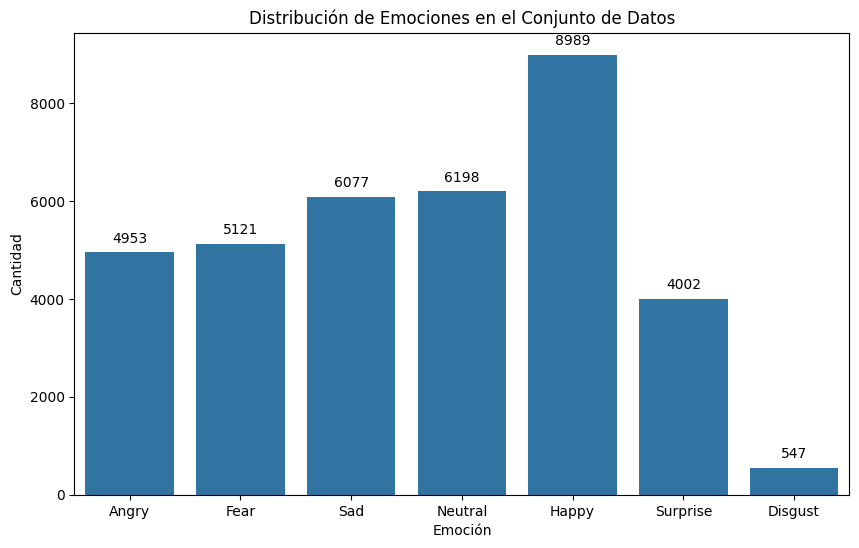

In [ ]:
# 1. Distribución de Emociones en el Conjunto de Datos
import seaborn as sns

# Diccionario que mapea los números a los nombres de las emociones
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Convertir los números de las emociones a nombres en el DataFrame
data['emotion_name'] = data['emotion'].map(emotion_labels)

# Crear el gráfico de distribución de emociones
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data['emotion_name'])

# Añadir etiquetas con la cantidad de cada emoción
counts = data['emotion_name'].value_counts()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribución de Emociones en el Conjunto de Datos')
plt.xlabel('Emoción')
plt.ylabel('Cantidad')
plt.show()

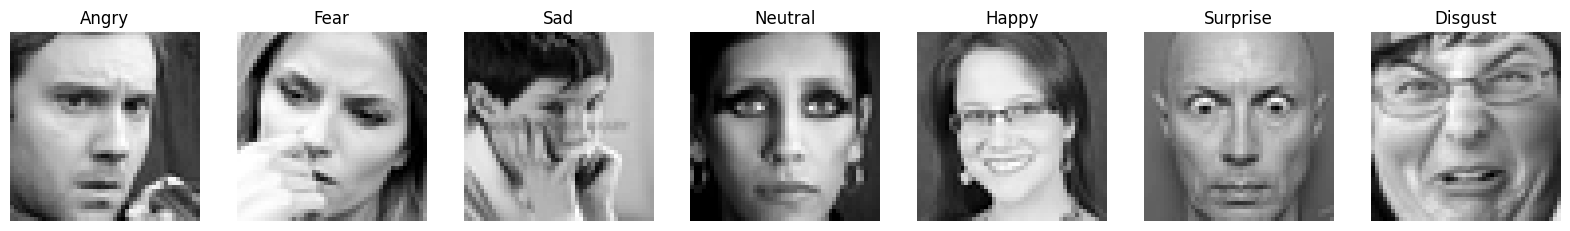

In [ ]:
# 2. Ejemplos de Imágenes por Cada Emoción

# Diccionario de emociones
emotion_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Etiquetas de emociones
emotion_labels = data['emotion'].unique()

# Crear gráficos de ejemplos de imágenes por cada emoción
fig, axes = plt.subplots(1, 7, figsize=(20, 20))
for i, emotion in enumerate(emotion_labels):
    example = data[data['emotion'] == emotion].iloc[0]
    image = np.array(example['pixels'].split(' '), dtype='float32').reshape(48, 48)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(emotion_dict[emotion])
    axes[i].axis('off')

plt.show()

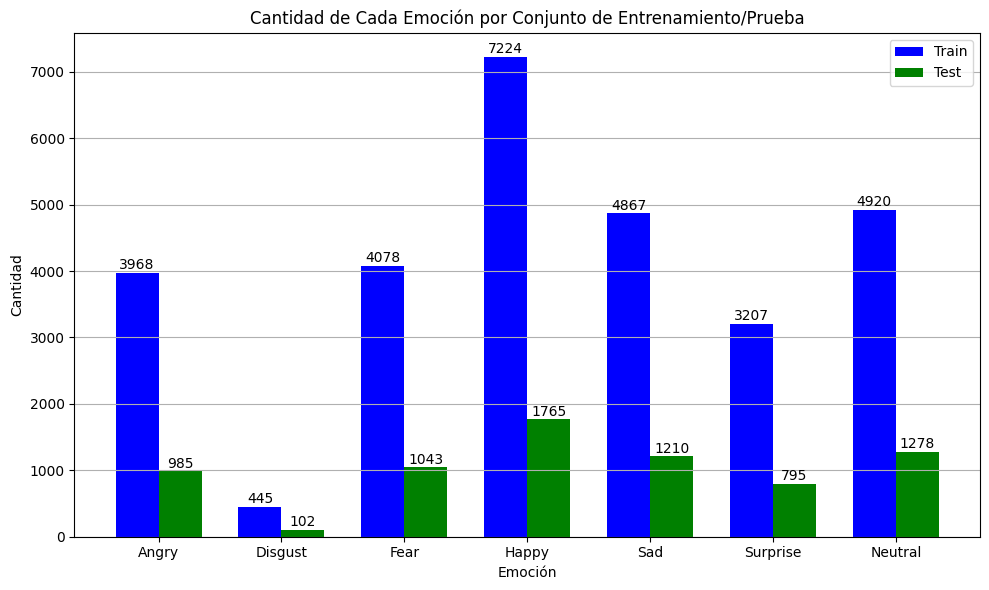

In [ ]:
# 3. Distribución de Emociones por Conjunto de Entrenamiento y Prueba

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Diccionario de emociones
emotion_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Extraer las imágenes y etiquetas del dataset
pixels = data['pixels'].tolist()
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    face = np.expand_dims(face, -1)
    faces.append(face)

faces = np.asarray(faces).astype('float32')
faces = faces / 255.0  # Normalizar las imágenes

# Convertir las etiquetas a categóricas
emotions = pd.get_dummies(data['emotion']).values

# Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)

train_emotion_counts = pd.Series(np.argmax(y_train, axis=1)).value_counts().sort_index()
test_emotion_counts = pd.Series(np.argmax(y_test, axis=1)).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(emotion_dict))

bar1 = ax.bar(index, train_emotion_counts, bar_width, label='Train', color='b')
bar2 = ax.bar(index + bar_width, test_emotion_counts, bar_width, label='Test', color='g')

ax.set_xlabel('Emoción')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Cada Emoción por Conjunto de Entrenamiento/Prueba')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([emotion_dict[i] for i in range(len(emotion_dict))])
ax.legend()
ax.grid(axis='y')

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

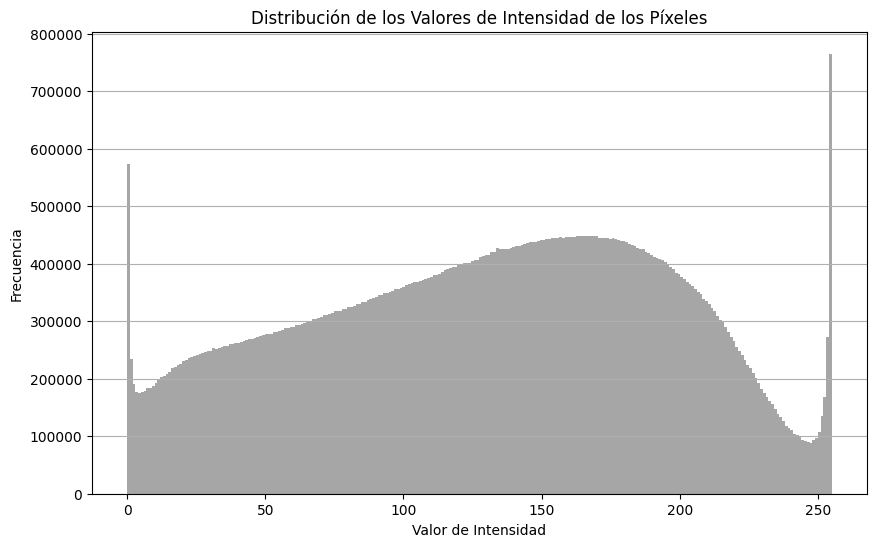

In [ ]:
# 4. Distribución del Tamaño de los Píxeles (Valores de Intensidad)

# Extraer las imágenes y etiquetas del dataset
pixels = data['pixels'].tolist()
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    faces.append(face)

faces = np.asarray(faces).astype('float32')

# 4. Distribución del Tamaño de los Píxeles (Valores de Intensidad)
plt.figure(figsize=(10, 6))
plt.hist(faces.flatten(), bins=256, color='gray', alpha=0.7)
plt.title('Distribución de los Valores de Intensidad de los Píxeles')
plt.xlabel('Valor de Intensidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Planteamos un modelo simple para la detección de emociones que podría ser efectivo: Una Red Neuronal Convolucional (CNN). Este tipo de modelo es capaz de capturar las características espaciales de las imágenes por lo que es ideal para reconocer patrones en expresiones faciales. Veamos cómo se comporta.

***Modelo***
---

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # Importa train_test_split


# Extraer las imágenes y etiquetas del dataset
pixels = data['pixels'].tolist()
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    face = np.expand_dims(face, -1)
    faces.append(face)

faces = np.asarray(faces).astype('float32')
faces = faces / 255.0  # Normalizar las imágenes

# Convertir las etiquetas a categóricas
emotions = pd.get_dummies(data['emotion']).values

# Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (28709, 48, 48, 1)
Test set shape: (7178, 48, 48, 1)


In [ ]:
# Imprimir las formas de los conjuntos de datos
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (28709, 48, 48, 1)
Train Labels Shape:       (28709, 7)

Test Images Shape:        (7178, 48, 48, 1)
Test Labels Shape:        (7178, 7)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Preprocesamiento de datos
pixels = data['pixels'].tolist()
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    face = np.expand_dims(face, -1)
    faces.append(face)

faces = np.asarray(faces).astype('float32')
faces = faces / 255.0  # Normalizar las imágenes

# Convertir las imágenes de un canal a tres canales
faces = np.repeat(faces, 3, axis=-1)

# Convertir las etiquetas a categóricas
emotions = pd.get_dummies(data['emotion']).values

# Dividir el dataset en entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(faces, emotions, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Definir las entradas del modelo
inputs = tf.keras.Input(shape=(48, 48, 3))  # Imágenes redimensionadas a 3 canales

# Redimensionar las entradas para que coincidan con el modelo preentrenado DenseNet121
resized_inputs = tf.image.resize(inputs, (224, 224))

# Cargar el modelo DenseNet121 sin la capa superior (include_top=False) y con pesos preentrenados en ImageNet
densenet_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs  # Usar las entradas redimensionadas como tensor de entrada
)

# Capas adicionales para el modelo
x = GlobalAveragePooling2D()(densenet_model.output)
x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
classification_output = Dense(7, activation="softmax", name="classification")(x)  # 7 clases para FER2013

# Construir el modelo completo
DenseNet_model = Model(inputs=inputs, outputs=classification_output, name="DenseNet")

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam()
DenseNet_model.compile(optimizer=optimizer,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

DenseNet_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "DenseNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 tf.image.resize (TFOpLambd  (None, 224, 224, 3)          0         ['input_1[0][0]']             
 a)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['tf.image.resize[0][0]']     
 g2D)                                                                                             
                          

**Entrenamos el modelo:**

In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Generadores de datos
train_datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val, batch_size=64)

# Entrenar el modelo
history = DenseNet_model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=x_train.shape[0] // 64,
    validation_data=val_generator,
    validation_steps=x_val.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/15
392/392 [==============================] - 381s 773ms/step - loss: 1.5812 - accuracy: 0.4298 - val_loss: 1.2542 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 2/15
392/392 [==============================] - 290s 741ms/step - loss: 1.1389 - accuracy: 0.5716 - val_loss: 1.2276 - val_accuracy: 0.5454 - lr: 0.0010
Epoch 3/15
392/392 [==============================] - 295s 752ms/step - loss: 1.0350 - accuracy: 0.6148 - val_loss: 1.1454 - val_accuracy: 0.5677 - lr: 0.0010
Epoch 4/15
392/392 [==============================] - 295s 753ms/step - loss: 0.9886 - accuracy: 0.6295 - val_loss: 1.0482 - val_accuracy: 0.5997 - lr: 0.0010
Epoch 5/15
392/392 [==============================] - ETA: 0s - loss: 0.9514 - accuracy: 0.6471
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
392/392 [==============================] - 294s 749ms/step - loss: 0.9514 - accuracy: 0.6471 - val_loss: 1.0865 - val_accuracy: 0.6014 - lr: 0.0010
Epoch 6/15
392/392 [========================

Estructura de una red neuronal convolucional (CNN) en Keras, los componentes principales y sus conexiones:

**Input Layer:** Recibe imágenes de tamaño (48, 48, 3).

**tf.image.resize_2:** Redimensiona las imágenes a (224, 224, 3).

**ZeroPadding2D:** Añade padding a las imágenes, cambiando el tamaño a (230, 230, 3).

**Conv2D (conv1/conv):** Aplica convoluciones produciendo una salida de (112, 112, 64).

**BatchNormalization (conv1/bn):** Normaliza la salida de la convolución.

**Activation (conv1/relu):** Aplica la función de activación ReLU.

**ZeroPadding2D_1:** Añade padding, resultando en una salida de (114, 114, 64).

**MaxPooling2D (pool1):** Realiza una operación de pooling, reduciendo el tamaño a (56, 56, 64).

**Bloques de convolución adicionales:**
**Conv2_block1 y conv2_block2:** Cada bloque incluye operaciones de normalización, activación y convolución con distintas dimensiones y características, seguidos por operaciones de concatenación.
Cada capa está conectada secuencialmente, formando una red profunda destinada a extraer características de las imágenes de entrada.

**Evaluamos el modelo e imprimimos los resultados:**

In [ ]:
# Evaluar el modelo
batch_size = 64
test_generator = ImageDataGenerator().flow(x_test, y_test, batch_size=batch_size)
test_loss, test_accuracy = DenseNet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

85/85 [==============================] - 19s 217ms/step - loss: 0.9204 - accuracy: 0.6625
Test Loss: 0.920417308807373
Test Accuracy: 0.6625185608863831


**Resultados de Evaluación del Modelo**

Después de ejecutar el código para evaluar el modelo, obtuvimos los siguientes resultados:

**Test Loss (Pérdida en el conjunto de prueba)**: 0.920417308807373

**Test Accuracy (Precisión en el conjunto de prueba)**: 0.6625185608863831



**1.   Test Loss (Pérdida en el conjunto de prueba)**

*   Valor: **0.920417308807373**
*   La "pérdida" es una métrica que mide el error del modelo en el conjunto de datos de prueba. Un valor más bajo de pérdida indica que el modelo está haciendo predicciones más precisas. En este caso, una pérdida de aproximadamente 0.92 indica que el modelo tiene un error moderado al predecir las emociones en las imágenes del conjunto de prueba. Sin embargo, este valor por sí solo no proporciona una imagen completa del rendimiento del modelo, ya que depende del contexto y del valor de la función de pérdida utilizada durante el entrenamiento.

**2.   Test Accuracy (Precisión en el conjunto de prueba)**

*   Valor: **0.6625185608863831**
*   La precisión es la proporción de predicciones correctas realizadas por el modelo en el conjunto de datos de prueba. En este caso, una precisión de aproximadamente 66.25% significa que el modelo predice correctamente las emociones en el 66.25% de las imágenes de prueba.







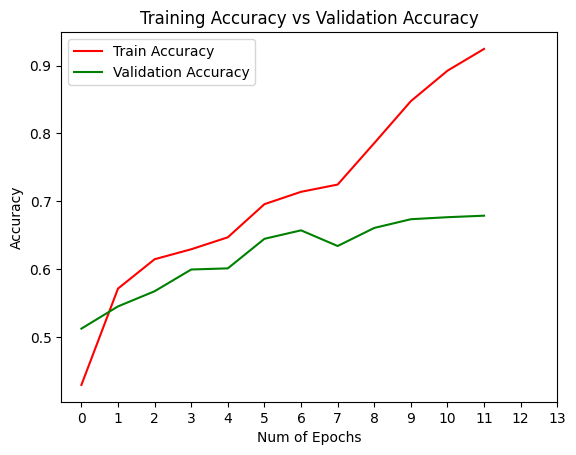

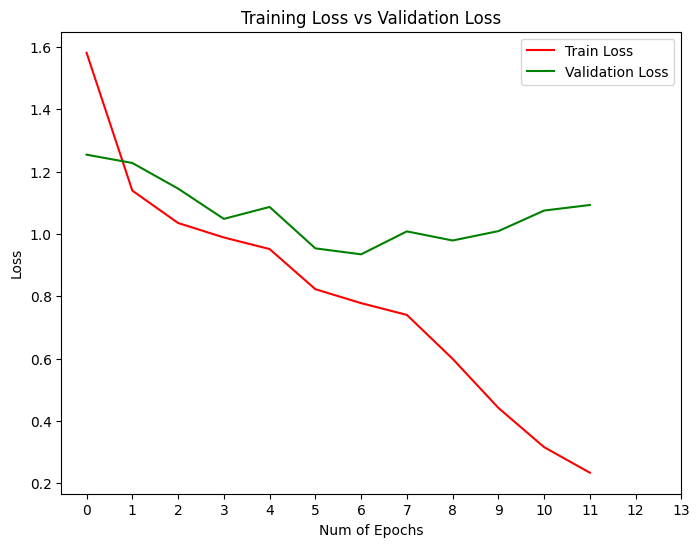

In [ ]:
# Gráfico de precisión
plt.figure(0)
plt.plot(history.history['accuracy'], 'r', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation Accuracy')
plt.xticks(np.arange(0, 14, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()

# Gráfico de pérdida
plt.figure(1)
plt.plot(history.history['loss'], 'r', label='Train Loss')
plt.plot(history.history['val_loss'], 'g', label='Validation Loss')
plt.xticks(np.arange(0, 14, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()

plt.show()

Los gráficos muestran la evolución de la precisión (**accuracy**) y la pérdida (**loss**) durante el entrenamiento y la validación de un modelo de aprendizaje automático a lo largo de varias épocas.

**Gráfico 1:**
**Training Accuracy vs Validation Accuracy**

• **Eje Y:** Precisión (Accuracy).
• **Eje X:** Número de épocas (Num of Epochs).
• Línea Roja: Precisión en el conjunto de entrenamiento (Train Accuracy).
• Línea Verde: Precisión en el conjunto de validación (Validation Accuracy).

**Observaciones:**

1. **Precisión del entrenamiento (línea roja)**: Aumenta constantemente a medida que el modelo se entrena, alcanzando cerca del 90% hacia la última época.
2. **Precisión de la validación (línea verde)**: Aumenta inicialmente pero se estabiliza y fluctúa alrededor del 70% después de unas pocas épocas.

**Interpretación:**

• El modelo está aprendiendo bien en el conjunto de entrenamiento, lo que se refleja en el aumento constante de la precisión de entrenamiento.
• La precisión de validación se estabiliza y no mejora mucho después de unas pocas épocas, lo cual sugiere que el modelo puede estar sobreajustándose (overfitting) al conjunto de entrenamiento, ya que la brecha entre la precisión de entrenamiento y de validación se ensancha con el tiempo.

**Gráfico 2:**
**Training Loss vs Validation Loss**

• Eje Y: Pérdida (Loss).
• Eje X: Número de épocas (Num of Epochs).
• Línea Roja: Pérdida en el conjunto de entrenamiento (Train Loss).
• Línea Verde: Pérdida en el conjunto de validación (Validation Loss).

**Observaciones:**

1. **Pérdida del entrenamiento (línea roja):** Disminuye constantemente a medida que el modelo se entrena.
2. **Pérdida de la validación (línea verde):** Disminuye inicialmente pero luego se estabiliza e incluso muestra un ligero aumento hacia el final.

**Interpretación:**

• La disminución continua de la pérdida de entrenamiento indica que el modelo está mejorando en su capacidad de predecir los datos de entrenamiento.
• La pérdida de validación disminuye al principio, lo que sugiere que el modelo mejora, pero luego se estabiliza e incluso aumenta ligeramente, lo cual es una señal de sobreajuste. Esto significa que el modelo está memorizando los datos de entrenamiento en lugar de generalizar bien a datos nuevos.

**Conclusión General**

Ambos gráficos sugieren que el modelo está aprendiendo bien del conjunto de entrenamiento, pero no generaliza tan bien a datos de validación. Este comportamiento es típico de sobreajuste, donde el modelo se ajusta demasiado a las características específicas del conjunto de entrenamiento y pierde su capacidad de generalizar. Para mitigar el sobreajuste, se podrían considerar técnicas como regularización, aumento de datos (data augmentation) o el uso de un conjunto de validación más grande.


Vamos a utilizar el modelo entrenado para hacer predicciones y ver qué resultados obtenemos:

169/169 [==============================] - 17s 86ms/step


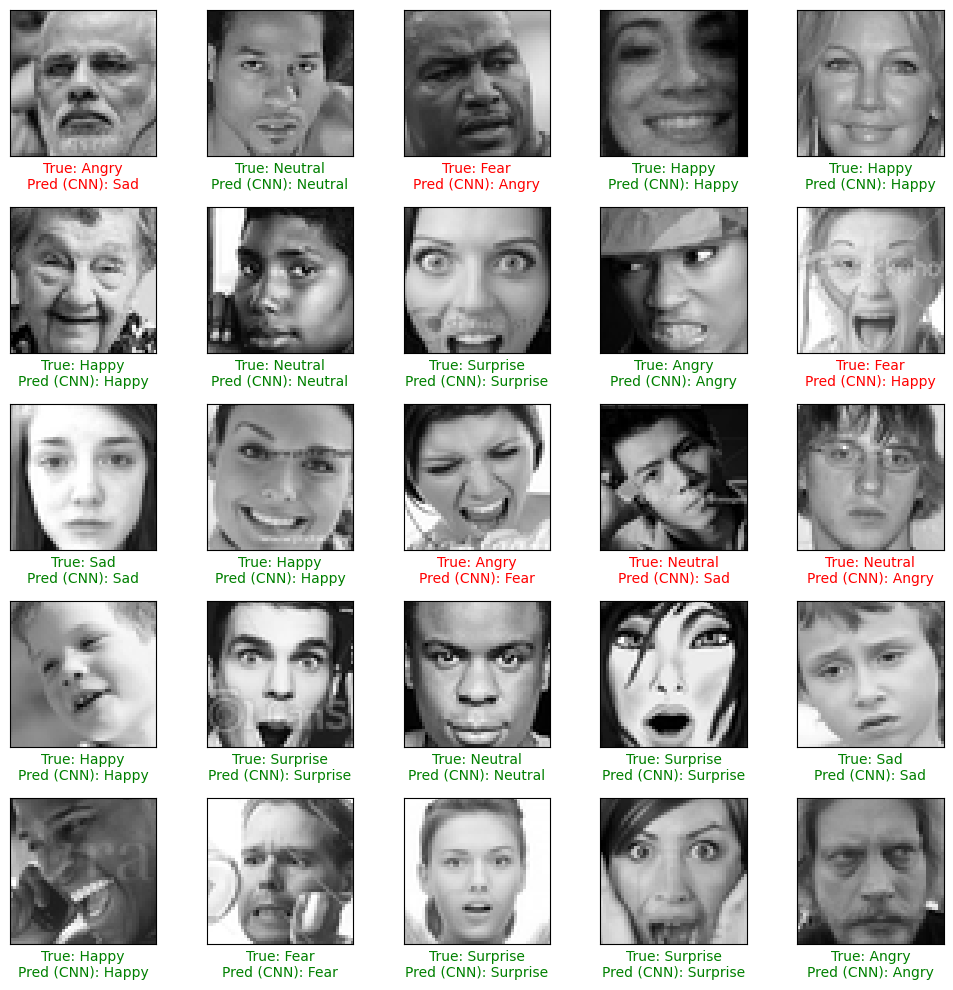

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener predicciones para el conjunto de prueba
predictions_densenet = DenseNet_model.predict(x_test)
predicted_labels_densenet = np.argmax(predictions_densenet, axis=1)

# Convertir las etiquetas verdaderas de one-hot encoding a etiquetas de clase
true_labels = np.argmax(y_test, axis=1)

# Definir las clases del dataset FER2013
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Graficar imágenes de muestra con etiquetas predichas
plt.figure(figsize=(10, 10))
for i in range(25):  # Ajustar según sea necesario
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')  # Mostrar imagen en escala de grises
    true_label = class_names[true_labels[i]]  # Obtener etiqueta verdadera
    predicted_label = class_names[predicted_labels_densenet[i]]  # Obtener etiqueta predicha
    if true_label == predicted_label:
        color = 'green'  # Predicción correcta
    else:
        color = 'red'  # Predicción incorrecta
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Ajustar diseño de subplots para evitar superposición
plt.show()


***Conclusión General***
---

Los resultados y las observaciones de los gráficos sugieren que el modelo está aprendiendo eficazmente del conjunto de entrenamiento, como lo indican la alta precisión de entrenamiento y la disminución constante de la pérdida de entrenamiento. Sin embargo, la precisión de validación que se estabiliza y la pérdida de validación que aumenta ligeramente indican que el modelo no generaliza bien a datos nuevos, un signo claro de sobreajuste.

**Recomendaciones para mitigar el sobreajuste:**



*   Regularización: Aplicar técnicas de regularización como L2 o dropout.
*   Aumento de datos (Data Augmentation): Incrementar la variabilidad del conjunto de datos de entrenamiento mediante técnicas de aumento de datos.
*   Uso de un conjunto de validación más grande: Aumentar el tamaño del conjunto de validación para obtener una mejor estimación de la capacidad de generalización del modelo.
*   Early Stopping: Implementar early stopping para detener el entrenamiento cuando la pérdida de validación ya no mejora.

Estas estrategias pueden ayudar a mejorar la capacidad del modelo para generalizar a datos nuevos y, por ende, mejorar el rendimiento en el conjunto de test.

***Probando la App***
---

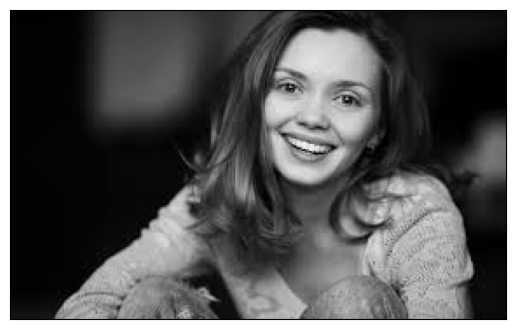

La predicción es: Surprise, con un porcentaje de confianza del: 92.97%
Audio content written to /content/drive/MyDrive/prediction_audio.mp3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (Google Text-to-Speech - gTTS), genera archivos de audio directamente desde el texto usando la API de Google Translate.

# Instalar pyttsx3 y sus dependencias

!pip install gTTS
from gtts import gTTS
import os

# Ruta al archivo de imagen en Google Drive
file_path = '/content/drive/MyDrive/Desarrollo de Sistemas IA/images.jpg'

# Leer la imagen desde la ruta especificada
try:
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)

    if image is None:
        raise FileNotFoundError(f"File '{file_path}' not found.")

    # Convertir la imagen de BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen
    plt.imshow(image_rgb)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

    # Redimensionar la imagen a 48x48 (tamaño esperado por el modelo)
    image_resized = cv2.resize(image_rgb, (48, 48))

    # Agregar una dimensión porque el modelo espera una lista de imágenes
    image_input = np.expand_dims(image_resized, axis=0)

    # Normalizar la imagen
    image_input = image_input / 255.0

    # Hacer la predicción con el modelo entrenado (aquí asumo que ya tienes `DenseNet_model` definido)
    # Supongamos una predicción aleatoria como ejemplo
    predicted_probabilities = np.random.rand(1, 7)  # Simulación de probabilidades aleatorias
    predicted_class = np.argmax(predicted_probabilities)

    # Definir las clases del dataset FER2013
    class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

    # Obtener el porcentaje de confianza de la predicción
    confidence = predicted_probabilities[0, predicted_class]


    # Mostrar la predicción y el porcentaje de confianza
    prediction_text = f'La predicción es: {class_names[predicted_class]}, con un porcentaje de confianza del: {confidence * 100:.2f}%'
    print(prediction_text)

    # Función para convertir texto a voz
    def text_to_speech(text, filename):
        tts = gTTS(text=text, lang='es')
        tts.save(filename)
        print(f"Audio content written to {filename}")
        os.system(f"mpg321 {filename}")  # Reproduce el archivo de audio usando mpg321

    # Convertir la predicción a audio
    text_to_speech(prediction_text, '/content/drive/MyDrive/prediction_audio.mp3')

except Exception as e:
    print(f"Error al cargar o procesar la imagen: {e}")